# MSc Thesis - Hugo Stam

#### Investment Strategy Simulation - Adaptive terminal planning in the light of an uncertain future

##### Example 2 - Offshore-onshore port system development. 
The offshore and onshore facilities are connected by barge link, therefore a navigation channel has to be dredged.

<img src="../OpenCLSim-offshore-terminal-analysis/Figures/2D_Drawings_barges_alt2.PNG" style="width:1000px">

* [**0. Prepare inputs:**](#0.-Prepare-inputs)<br>
   * [**0.1 Generate demand forecast scenario:**](#0.1-Generate-demand-forecast-scenario)<br>
   * [**0.2 Generate vessels:**](#0.2-Generate-vessels)<br>
   * [**0.3 Generate site specific conditions:**](#0.3-Generate-site-specific-conditions)<br>
* [**1. Instatiate system components:**](#1.-Instatiate-system-components)<br>
* [**2. Start simulation:**](#2.-Strart-simulation)<br>
* [**3. Report all elements:**](#3.-Report-all-elements)<br>

#### notes:

- add navigation channel in front of offshore terminal (capex and opex)
- add bridge/causeway between offshore-onshore terminal (capex and opex)
- add overseas transport costs (opex)

In [1]:
import numpy as np
import pandas as pd
import statistics as st

import matplotlib.pyplot as plt
import matplotlib as mpl

from opentisim import container_objects
from opentisim import container_defaults
from opentisim import container_system

# 0. Prepare inputs

In [2]:
startyear = 2020
lifecycle = 15

## 0.1 Generate demand forecast scenario

In [3]:
years = list(range(startyear, startyear+lifecycle))

demand = []
for year in years:
    if year <= 2025:
        demand.append(1_000_000)
    elif year <= 2030:
        demand.append(1_500_000)
    else:
        demand.append(2_000_000)

scenario_data={'year': years, 'volume': demand}

# instantiate a commodity objects
container_defaults.container_data['fully_cellular_perc'] = 0
container_defaults.container_data['panamax_perc'] = 50
container_defaults.container_data['panamax_max_perc'] = 0
container_defaults.container_data['post_panamax_I_perc'] = 0
container_defaults.container_data['post_panamax_II_perc'] = 0
container_defaults.container_data['new_panamax_perc'] = 30
container_defaults.container_data['VLCS_perc'] = 10
container_defaults.container_data['ULCS_perc'] = 10

# ladens
container_defaults.container_data['historic_data'] = []
container = container_objects.Commodity(**container_defaults.container_data)
container.scenario_data = pd.DataFrame(data=scenario_data)

# combine
demand = [container]

# plot scenarios 
if False:
    laden.plot_demand()

## 0.2 Generate vessels

In [4]:
# instantiate vessels
fully_cellular = container_objects.Vessel(**container_defaults.fully_cellular_data)
panamax = container_objects.Vessel(**container_defaults.panamax_data)
panamax_max = container_objects.Vessel(**container_defaults.panamax_max_data)
post_panamax_I = container_objects.Vessel(**container_defaults.post_panamax_I_data)
post_panamax_II = container_objects.Vessel(**container_defaults.post_panamax_II_data)
new_panamax = container_objects.Vessel(**container_defaults.new_panamax_data)
VLCS = container_objects.Vessel(**container_defaults.VLCS_data)
ULCS = container_objects.Vessel(**container_defaults.ULCS_data)

vessels = [fully_cellular, panamax, panamax_max, post_panamax_I, post_panamax_II, new_panamax, VLCS, ULCS] 

# 1. Instatiate system components

## 1.1 Terminal system

In [5]:
Terminal = container_system.System(startyear = startyear, 
                        lifecycle = lifecycle, 
                        elements = demand + vessels, 
                        operational_hours = 7500,
                        debug=True)

# 2. Start simulation

This method automatically generates investment decisions, parametrically derived from overall demand trends and a number of investment triggers.

Apply frame of reference style decisions while stepping through each year of the terminal lifecycle and check if investment is needed (in light of strategic objective, operational objective, QSC, decision recipe, intervention method):
    1. for each year evaluate the demand of each commodity
    2. for each year evaluate the various investment decisions
    3. for each year calculate the energy costs (requires insight in realized demands)
    4. for each year calculate the demurrage costs (requires insight in realized demands)
    5. for each year calculate terminal revenues
    6. collect all cash flows (capex, opex, revenues)
    7. calculate PV's and aggregate to NPV

In [6]:
Terminal.simulate()


Below, the various investment decisions are evaluated for the year 2020.

Simulate year: 2020
  Total vessel calls: 295
  Fully cellular calls: 0
  Panamax calls: 295
  Panamax max calls: 0
  Post Panamax I calls: 0
  Post Panamax II calls: 0
  New Panamax calls: 0
  VLCS calls: 0
  ULCS calls: 0
  Total cargo volume: 1000000
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy planned (@ start of year): inf
     Berth occupancy online (@ start of year): inf
     Crane occupancy planned (@ start of year): inf
     Crane occupancy online (@ start of year): inf
     waiting time factor (@ start of year): inf
     waiting time occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy planned (after adding berth): inf
     Berth occupancy online (after adding berth): inf
  *** add Quay to elements
     Berth occupancy planned (after add

c:\checkouts\opentisim\opentisim\container_system.py:1502: FutureWarning: `item` has been deprecated and will be removed in a future version
  volume = commodity.scenario_data.loc[commodity.scenario_data['year'] == year]['volume'].item()
c:\checkouts\opentisim\opentisim\container_system.py:1984: FutureWarning: `item` has been deprecated and will be removed in a future version
  volume = commodity.scenario_data.loc[commodity.scenario_data['year'] == year]['volume'].item()
c:\checkouts\opentisim\opentisim\container_system.py:1550: FutureWarning: `item` has been deprecated and will be removed in a future version
  volume = commodity.scenario_data.loc[commodity.scenario_data['year'] == year]['volume'].item()



  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
     Empty stack capacity planned (@ start of year): 0
     Empty stack capacity online (@ start of year): 0
     Empty stack capacity required (@ start of year): 1923.0769230769229
     Empty ground slots required (@ start of year): 320.5128205128205
  *** add empty stack to elements

  *** add laden stack to elements
     Empty stack capacity planned (@ start of year): 2400
     Empty stack capacity online (@ start of year): 2400
     Empty stack capacity required (@ start of year): 2884.6153846153848
     Empty ground slots required (@ start of year): 480.7692307692308
  *** add empty stack to elements
  *** add empty stack to elements
     OOG slots planned (@ start of year): 500
     OOG slots online (@ start of year): 500
     OOG slots required (@ start of year): 723.7386269644334
  *** add OOG stack to elements
  *** add OOG stack to elements
  *** add OOG stack to elements
     Number of stack equipment online (@ start of year): 24
     Gate capacity planned (@ start of year): 240
     Gate capacity online (@ start of year): 240
     Gate service rate planned (@ start of year): 1.3522332506203476
     Gate lane minutes  (@ start of year): 324.5359801488834
  *** add gate to elements
  *** add gate to elements
     Empty handlers online (@ start of year): 30


  *** add laden stack to elements
  *** add laden stack to elements
  *** add laden stack to elements
     Empty stack capacity planned (@ start of year): 3360
     Empty stack capacity online (@ start of year): 3360
     Empty stack capacity required (@ start of year): 3846.1538461538457
     Empty ground slots required (@ start of year): 641.025641025641
  *** add empty stack to elements
  *** add empty stack to elements
     OOG slots planned (@ start of year): 800
     OOG slots online (@ start of year): 800
     OOG slots required (@ start of year): 964.9848359525778
  *** add OOG stack to elements
  *** add OOG stack to elements
     Number of stack equipment online (@ start of year): 36
     Gate capacity planned (@ start of year): 360
     Gate capacity online (@ start of year): 360
     Gate service rate planned (@ start of year): 1.2019851116625309
     Gate lane minutes  (@ start of year): 432.7146401985111
  *** add gate to elements
  *** add gate to elements
     Empty han

PV: [-5.14838604e+07 -2.08689254e+08 -3.29296775e+07 -2.89953998e+07
 -2.55311704e+07 -2.24808303e+07 -6.70485377e+07 -3.70100387e+07
 -2.27175222e+07 -2.00033431e+07 -1.76134409e+07 -3.68673001e+07
 -1.78639015e+07 -1.57296094e+07 -1.38503122e+07]
NPV: -618814198.3672526


## 3. Report all elements

In [7]:
if True: 
    for element in Terminal.elements:
        print("")
        print(element.name)
        print("")
        print(element.__dict__) # This is the dictionary containing the module's symbol table. 
        # object.__dict__ A dictionary or other mapping object used to store an object's (writable) attributes.


Laden

{'historic_data': [], 'scenario_data':     year   volume
0   2020  1000000
1   2021  1000000
2   2022  1000000
3   2023  1000000
4   2024  1000000
5   2025  1000000
6   2026  1500000
7   2027  1500000
8   2028  1500000
9   2029  1500000
10  2030  1500000
11  2031  2000000
12  2032  2000000
13  2033  2000000
14  2034  2000000, 'handling_fee': 150, 'fully_cellular_perc': 0, 'panamax_perc': 100, 'panamax_max_perc': 0, 'post_panamax_I_perc': 0, 'post_panamax_II_perc': 0, 'new_panamax_perc': 0, 'VLCS_perc': 0, 'ULCS_perc': 0, 'name': 'Laden', 'id': '0ef9cfb6-e4f6-11e9-95e1-04d3b0b539c4'}

Fully_Cellular_1

{'type': 'Fully_Cellular', 'call_size': 2500, 'LOA': 215, 'draught': 10.0, 'beam': 20.0, 'max_cranes': 4, 'all_turn_time': 31, 'mooring_time': 6, 'demurrage_rate': 730, 'starting_fee': 30, 'variable_fee': 0.045, 'avg_overseas_distance': 3000, 'name': 'Fully_Cellular_1', 'id': '0efb0776-e4f6-11e9-ac35-04d3b0b539c4'}

Panamax_1

{'type': 'Panamax', 'call_size': 3400, 'LOA': 250, 'dr


{'triggers': [], 'labour': 144230.76923076922, 'maintenance': 8500.0, 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'fuel': [], 'capex': 86000, 'type': 'tractor_trailer', 'ownership': 'Terminal operator', 'delivery_time': 0, 'lifespan': 10, 'unit_rate': 85000, 'mobilisation': 1000, 'maintenance_perc': 0.1, 'insurance_perc': 0.01, 'crew': 1, 'salary': 30000, 'utilisation': 0.8, 'fuel_consumption': 2, 'productivity': 1, 'required': 5, 'non_essential_moves': 1.2, 'year_purchase': [], 'year_online': 2022, 'name': 'Tractor-trailer', 'id': '0f537c1a-e4f6-11e9-b4fe-04d3b0b539c4', 'shift': 5.769230769230769, 'df':     year    capex  maintenance         labour          fuel
0   2020      0.0          0.0       0.000000      0.000000
1   2021  86000.0          0.0       0.000000      0.000000
2   2022      0.0       8500.0  144230.769231  51023.041475
3   2023      0.0       8500.0  144230.769231  51023.041475
4   2024      0.0       8500.0  144230.769231  51023.0

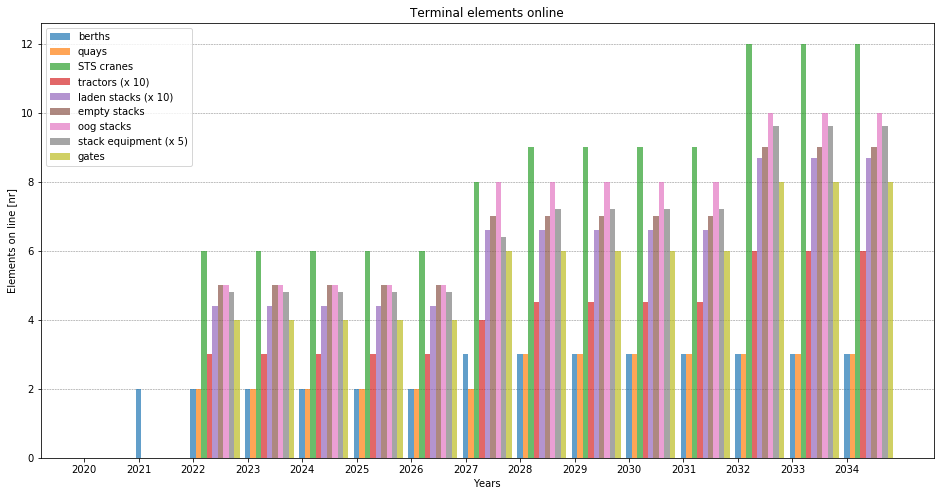

In [8]:
Terminal.terminal_elements_plot()

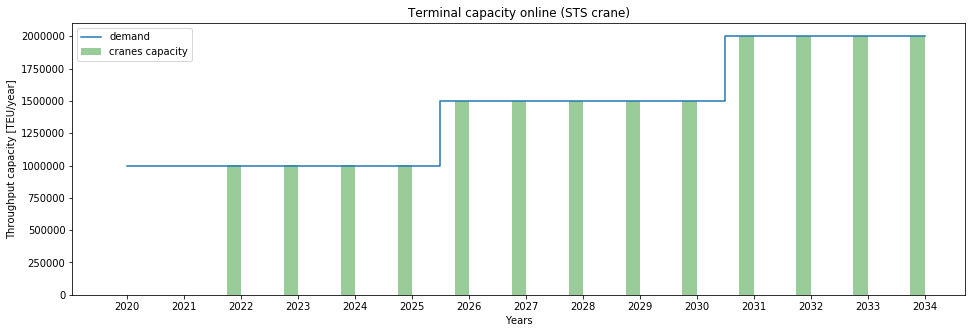

In [9]:
Terminal.terminal_capacity_plot()

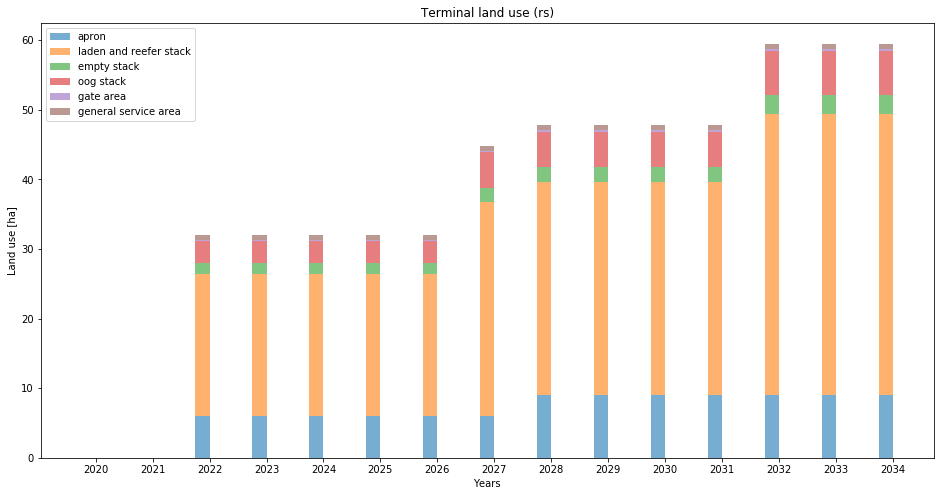

In [10]:
Terminal.land_use_plot()

#### Add cash flow information for each of the terminal elements.

In [11]:
cash_flows, cash_flows_WACC_real = Terminal.add_cashflow_elements()

    year        capex   maintenance    insurance        energy        labour  \
0   2020   51483860.4  0.000000e+00        0.000  0.000000e+00           NaN   
1   2021  237005521.6  0.000000e+00        0.000  0.000000e+00           NaN   
2   2022          0.0  1.051402e+07  1333312.470  4.532241e+06  2.337346e+07   
3   2023          0.0  1.051402e+07  1333312.470  4.532241e+06  2.337346e+07   
4   2024          0.0  1.051402e+07  1333312.470  4.532241e+06  2.337346e+07   
5   2025          0.0  1.051402e+07  1333312.470  4.532241e+06  2.337346e+07   
6   2026   96946704.2  1.051402e+07  1333312.470  6.133670e+06  2.485346e+07   
7   2027   31111286.8  1.475926e+07  1533312.470  6.155426e+06  3.254577e+07   
8   2028          0.0  1.556841e+07  1999968.705  6.160509e+06  3.506019e+07   
9   2029          0.0  1.556841e+07  1999968.705  6.160509e+06  3.506019e+07   
10  2030          0.0  1.556841e+07  1999968.705  6.160509e+06  3.506019e+07   
11  2031   82136974.0  1.556841e+07  199

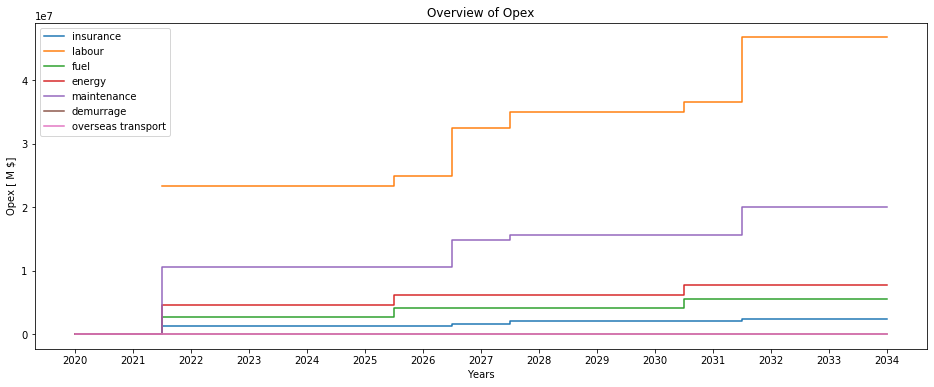

In [12]:
Terminal.opex_plot(cash_flows)

c:\checkouts\opentisim\opentisim\container_system.py:2467: FutureWarning: `item` has been deprecated and will be removed in a future version
  - cash_flows.loc[cash_flows['year'] == year]['overseas_transport'].item())


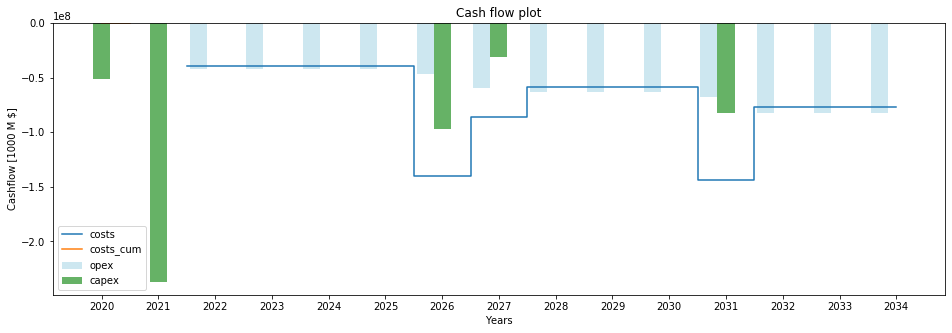

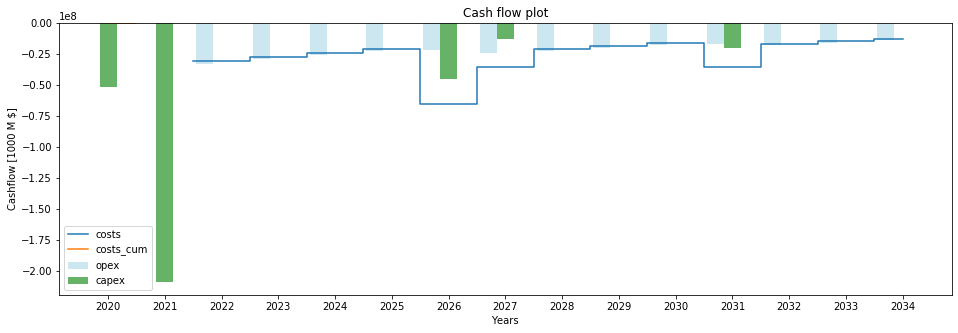

In [13]:
Terminal.cashflow_plot(cash_flows)
Terminal.cashflow_plot(cash_flows_WACC_real)

In [14]:
Terminal.NPV()

PV: [-5.14838604e+07 -2.08689254e+08 -3.29296775e+07 -2.89953998e+07
 -2.55311704e+07 -2.24808303e+07 -6.70485377e+07 -3.70100387e+07
 -2.27175222e+07 -2.00033431e+07 -1.76134409e+07 -3.68673001e+07
 -1.78639015e+07 -1.57296094e+07 -1.38503122e+07]
NPV: -618814198.3672526
